# Test reading with the new classes

In [1]:
import numpy as np
from pySNOM.readers import Reader
from pySNOM.images import Image, Data, DataTypes

filename = r'C:\Users\NEMETHG\OneDrive\Python\pySNOM\pySNOM\datasets\testPsHetImage.gwy'

file_reader = Reader(filename)
# From raw data black
# Reads all the files
rawgwydata = file_reader.read_gwyfile()
measurement = Data(filename = filename, data = rawgwydata, mode = 'PsHet')
O2Aimage = measurement.getImageFromChannel('O2A raw')

# From a single channel
channel_name = 'O2A raw'
O2Achanneldata = file_reader.read_gwychannel(channel_name)
O2Aimage = Image(O2Achanneldata)
O2Aimage.setChannel(channel_name)

# Read the info file
info_filename = r'C:\Users\NEMETHG\OneDrive\Python\pySNOM\pySNOM\datasets\testinfofile.txt'
file_reader.setFilename(info_filename)
infodict = file_reader.read_nea_infofile()
# Set parameters from the info dictionary
O2Aimage.setParameters(infodict=infodict)

In [2]:
print(f' Measurement mode: {O2Aimage.mode}\n Channel: {O2Aimage.channel}\n Data type: {O2Aimage.datatype}\n Demod order: {O2Aimage.order}')
print(f'X resolution: {O2Aimage.xres}')
print(f'Data size: {np.shape(O2Aimage.data)}')

 Measurement mode: MeasurementModes.PsHet
 Channel: O2A raw
 Data type: DataTypes.Amplitude
 Demod order: 2
X resolution: 200
Data size: (200, 200)


# Test reading from GSF file

In [5]:
filename = r'C:\Users\NEMETHG\OneDrive\Python\pySNOM\pySNOM\datasets\2024-07-20 120104 PH fs+E-NP-line28 O3P raw.gsf'
file_reader = Reader(filename)

channel_name = 'O3P raw'
O3Pchanneldata = file_reader.read_gsffile()
O3Pimage = Image(O3Pchanneldata)
O3Pimage.setChannel(channel_name)
O3Pimage.setMeasurementMode("PsHet")

print(f' Measurement mode: {O3Pimage.mode}\n Channel: {O3Pimage.channel}\n Data type: {O3Pimage.datatype}\n Demod order: {O3Pimage.order}')
print(f'X resolution: {O3Pimage.xres}')
print(f'Data size: {np.shape(O3Pimage.data)}')

 Measurement mode: MeasurementModes.None
 Channel: O3P raw
 Data type: DataTypes.Phase
 Demod order: 3
X resolution: 300
Data size: (400, 300)


# Test the image proccesing

[]

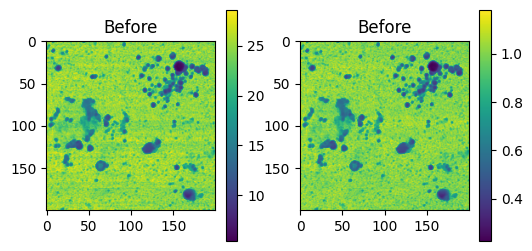

In [3]:
import matplotlib.pyplot as plt
# Plotting the BEFORE
px = 1/plt.rcParams['figure.dpi']
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(600*px, 300*px))
im1 = ax1.imshow(O2Aimage.data)
ax1.set_title('Before')
fig.colorbar(im1,ax=ax1)

# Processing
d = O2Aimage.processor.line_level(mtype="median", datatype=DataTypes["Amplitude"])
O2Aimage.setData(d)

# Plotting the AFTER
im2= ax2.imshow(O2Aimage.data)
ax2.set_title('Before')
fig.colorbar(im2,ax=ax2)

plt.plot()
